
# TP555 - AI/ML

### Lista de Exercícios #2

##### Regressão Linear

8) Neste exercício você irá utilizar a esquema de decaimento programado do passo de
aprendizagem conhecido como decaimento exponencial juntamente com o algoritmo
do gradiente descendente estocástico com critério de parada definido como sendo
quando a diferença absoluta entre o erro da iteração atual e a anterior caia abaixo de
0.001 ou que o número máximo de iterações tenha sido atingido. Defina o número
máximo de iterações como
maxNumIter = n_epochs*M,
onde n_epochs = 1 e M = 1000. Dada a seguinte função observável
y_noisy = 2.5*x1 + 1.3*x2 + w,
onde x1, x2 e w são variáveis aleatórias seguindo a distribuição Gaussiana normal
padrão, ou seja, com média zero e variância unitária. Gere M = 1000 exemplos a partir
desta função observável. Agora faça o seguinte:


In [131]:
# Importa todas as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import math

In [132]:
# Utiliza uma geração de números PSEUDO aleatórios
np.random.seed(42)

In [133]:
# Configura o número de amostras que se deseja utilizar
M = 1000

In [134]:
# Funções de entradas (Features):
x1 = np.random.randn(M, 1) #Função normal com média 0 e variância unitária
x2 = np.random.randn(M, 1) #Função normal com média 0 e variância unitária

# Função de ruído:
w  = np.random.randn(M, 1) #Função normal com média 0 e variância unitária

# Função de saída (Target):
y = 2.5 * x1 + 1.3 * x2 + w # Entradas + ruído

In [135]:
# Configura o número de iterações
N = 200

# Gera uma matriz de pesos:
a1 = np.linspace(-12.0, 16.0, N)
a2 = np.linspace(-12.0, 16.0, N)

# Cria uma malha para a criação do gráfico 3D
A1, A2 = np.meshgrid(a1,a2)

a) Plote a superfície de erro considerando a seguinte função hipótese: h(x1,x2) =
a1*x1 + a2*x2

In [136]:
# Cria uma matriz de zeros para inserção dos valores de erro
J = np.zeros((N,N))

In [137]:
# Faz as iterações e a criação da superfície de erro
for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A1[iter1][iter2] * x1 + A2[iter1][iter2] * x2
        J[iter1][iter2] = (1.0/M)*np.sum( np.square(y - yhat))

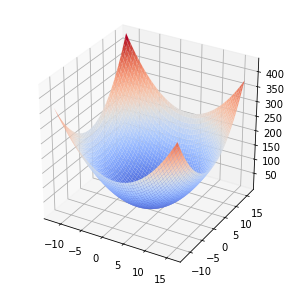

In [138]:
#Faz a plotagem da superfície de erro
fig = plt.figure(figsize=(5,5))

ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1,A2,J, cmap = cm.coolwarm)

plt.show()

In [139]:
# Concatena as features 
X = np.c_[x1, x2]

In [140]:
# Encontra o peso ótimo pela formula fechada
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
# Encontra o valor de saída por meio das entradas e do peso
y_hat = X.dot(a_opt)
# Encontra o erro mínimo na superfície de erro
J_opt = (1.0/M)*np.sum(np.power((y - yhat), 2))

In [141]:
# Configura o número de épocas
n_epochs = 1
# Configura o valor do passo de aprendizado
alpha_int = 0.3

def timeBasedDecay(alpha_int, k, t):
    return alpha_int / (1 + k*t)

In [142]:
def exponentialDecay(alpha_int, k, t):
    return alpha_int * np.exp(-k * t)

In [143]:
def stepDecay(alpha_int, t):
    drop = 0.5
    epochs_drop = 4.0
    alpha = alpha_int * math.pow(drop, math.floor((1+t)/epochs_drop))
    return alpha

In [144]:
k = 0.00005
mu = 0.07

In [145]:
def learning_schedule(typels, alpha_int, k, t):
    mu = 0
    if(typels=='exp'):
        alpha = exponentialDecay(alpha_int, k, t)
    elif(typels=='time'):
        alpha = timeBasedDecay(alpha_int, k, t)
    elif(typels=='step'):
        alpha = stepDecay(alpha_int, t)
    elif(typels=='mom'):
        alpha = alpha_int
        mu = mu
    elif(typels=='none'):
        alpha = alpha_int
    else:
        alpha = alpha_int
    return alpha, mu

In [146]:
a = np.array([-10.0, -10.0]).reshape(2, 1)

a_hist = np.zeros((2, n_epochs*M+1))
a_hist[:, 0] = a.reshape(2,)

alpha_hist = np.zeros((n_epochs*M))

update_prev = np.zeros((2, 1))

Jgd = np.zeros(n_epochs*M+1)

Jgd[0] = (1.0/M)*sum(np.power(y - X.dot(a), 2))

In [147]:
update_hist = np.zeros((2, n_epochs*M))

for epoch in range(n_epochs):
    for i in range(M):
        random_index = np.random.randint(M)
        xi = X[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = -2.0*xi.T.dot(yi - xi.dot(a))      
        alpha, mu = learning_schedule('step', alpha_int, k, epoch*M + i)
        alpha_hist[epoch*M+i] = alpha
        update = alpha*gradients + mu*update_prev
        update_hist[:, epoch*M+i] = update.reshape(2,) 
        a = a - update
        a_hist[:, epoch*M+i+1] = a.reshape(2,)
        update_prev = update
        Jgd[epoch*M+i+1] = (1.0/M)*sum(np.power((y - X.dot(a)) , 2))

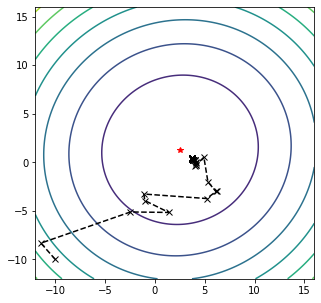

In [148]:
fig = plt.figure(figsize=(5,5))
cp = plt.contour(A1, A2, J)

plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
plt.plot(a_hist[0, :], a_hist[1, :], 'kx--')

plt.show()

b) Encontre os valores ótimos dos pesos através da fórmula fechada, ou seja, a
equação normal.

In [149]:
print('a0_opt: ' + str(a_opt[0, 0]))
print('a1_opt: ' + str(a_opt[1, 0]))

print('a0_sgd: ' + str(a[0, 0]))
print('a1_sgd: ' + str(a[1, 0]))

a0_opt: 2.521947043938519
a1_opt: 1.2902629792949658
a0_sgd: 3.6812561826943764
a1_sgd: 0.4067245241484686


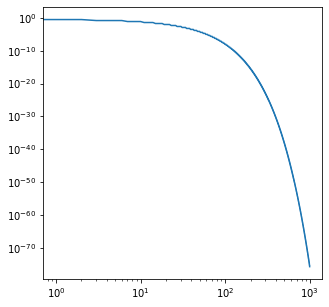

In [150]:
fig = plt.figure(figsize=(5,5))
plt.yscale("log")
plt.xscale("log")

plt.plot(range(0,n_epochs*M), alpha_hist)

plt.show()

c) Treine o modelo utilizando apenas o algoritmo do gradiente descendente
estocástico

In [151]:
n_epochs = 1

alpha = 0.1

a = np.array([-10.0, -10.0]).reshape(2,1)

a_hist = np.zeros((2, n_epochs * M + 1))

a_hist[:, 0] = a.reshape(2,)

Jgd = np.zeros(n_epochs * M + 1)

Jgd[0] = (1.0/M)*sum(np.power(y - X.dot(a), 2))

In [152]:
grad_hist = np.zeros((2, n_epochs*M))
update_hist = np.zeros((2, n_epochs*M))

In [153]:
for epoch in range(n_epochs):
    for i in range(M):
        random_index = np.random.randint(M)
        xi = X[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = -2.0*xi.T.dot(yi - xi.dot(a))
        grad_hist[:, epoch*M+i] = gradients.reshape(2,)
        update = alpha * gradients
        update_hist[:, epoch*M+i] = update.reshape(2,)
        a = a - update
        a_hist[:, epoch*M+i+1] = a.reshape(2,)
        Jgd[epoch*M+i+1] = (1.0/M)*sum(np.power((y - X.dot(a)) , 2))

i ) A superfície de contorno mostrando a evolução da atualização dos
pesos

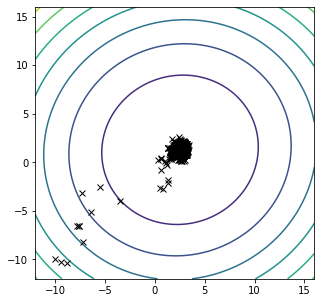

In [154]:
fig = plt.figure(figsize=(5,5))
cp = plt.contour(A1, A2, J)

plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
plt.plot(a_hist[0, :], a_hist[1, :], 'kx')

ii )  O gráfico de erro versus número de iterações necessárias para que o
critério de parada seja atingido

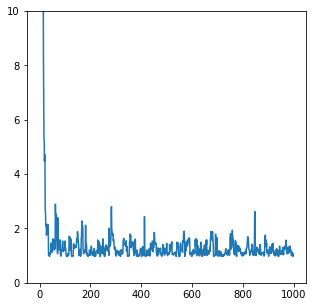

In [155]:
fig = plt.figure(figsize=(5,5))
plt.ylim(0,10)

plt.plot(np.arange(0, n_epochs * M), Jgd[0: n_epochs * M])

iii ) O gráfico da variação da atualização (i.e., alpha*vetor_gradiente) versus
o número de iterações necessárias para que o critério de parada seja
atingido. Mostre a variação da atualização para cada peso em figuras
separadas.

e) Agora, treine o modelo utilizando o algoritmo do gradiente descendente
estocástico com os esquema de decaimento programado do passo de
aprendizagem conhecido como decaimento exponencial. A fórmula
matemática deste esquema é dada por
alpha = alpha_initial * exp(-k * t),
Onde k é a taxa de decaimento da exponencial, t é o número da iteração e
alpha_initial é o valor inicial do passo de aprendizagem. OBS.: Não se esqueça
de encontrar os melhores valores (aqueles que façam com que o tempo de
convergência e a oscilação do GDE diminuam) de alpha e k.

In [156]:
def timeBasedDecay(alpha_int, k, t):
    return alpha_int / (1 + k*t)

In [157]:
def exponentialDecay(alpha_int, k, t):
    return alpha_int * np.exp(-k*t)

In [158]:
def stepDecay(alpha_int, t, drop=0.5, epochs_drop = 4.0):
    alpha = alpha_int * math.pow(drop,  math.floor((1+t)/epochs_drop))
    return alpha

In [159]:
k = 0.01
def learning_schedule(typels, alpha_int, k, t, mu=0.9):
    if(typels=='exp'):
        mom = 0.0
        alpha = exponentialDecay(alpha_int, k, t)
    elif(typels=='time'):
        mom = 0.0
        alpha = timeBasedDecay(alpha_int, k, t)
    elif(typels=='step'):
        mom = 0.0
        alpha = stepDecay(alpha_int, t)
    elif(typels=='mom'):
        mom = mu
        alpha = alpha_int
    elif(typels=='momstep'):
        mom = mu
        alpha = stepDecay(alpha_int, t)
    elif(typels=='none'):
        mom = 0.0
        alpha = alpha_int
    else:
        mom = 0.0
        alpha = alpha_int
    return alpha, mom

In [160]:
n_epochs = 1
alpha_mom = 0.001
mu = 0.5

In [161]:
a = np.array([-10.0, -10.0]).reshape(2, 1)

a_hist = np.zeros((2, n_epochs*M+1))

a_hist[:, 0] = a.reshape(2,)

alpha_hist = np.zeros((n_epochs*M))

update_prev = np.zeros((2, 1))

Jgd = np.zeros(n_epochs*M+1)

Jgd[0] = (1.0/M)*sum(np.power(y_noisy - X.dot(a), 2))

In [162]:
update_hist = np.zeros((2, n_epochs*M))
for epoch in range(n_epochs):
    for i in range(M):
        random_index = np.random.randint(M)
        xi = X[random_index:random_index+1]
        yi = y_noisy[random_index:random_index+1]
        gradients = -2.0*xi.T.dot(yi - xi.dot(a))       
        alpha, mu = learning_schedule('mom', alpha_mom, k, (epoch*M + i), mu)
        alpha_hist[epoch*M+i] = alpha
        update = alpha*gradients + mu*update_prev
        update_hist[:, epoch*M+i] = update.reshape(2,)
        a = a - update
        a_hist[:, epoch*M+i+1] = a.reshape(2,)
        update_prev = update
        Jgd[epoch*M+i+1] = (1.0/M)*sum(np.power((y_noisy - X.dot(a)) , 2))
        
a_mom = a

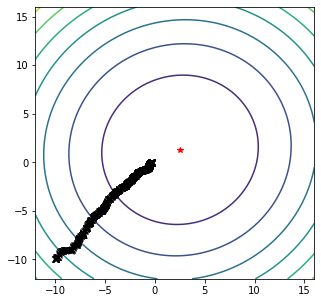

In [163]:
# Plot figure.        
fig = plt.figure(figsize=(5,5))
cp = plt.contour(A1, A2, J)

plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
plt.plot(a_hist[0, :], a_hist[1, :], 'kx--')

plt.show()

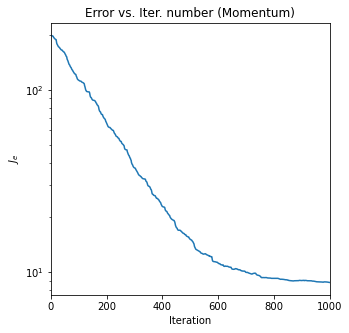

In [164]:
fig = plt.figure(figsize=(5,5))

plt.plot(np.arange(0, n_epochs*M), Jgd[0:n_epochs*M])
plt.xlim((0, n_epochs*M))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iter. number (Momentum)')
plt.savefig("error_vs_iteration_mom.png", dpi=600)
plt.show()